In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data

In [2]:
data = pd.read_csv("House_Rent_Dataset.csv")

In [3]:
data.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [6]:
data['BHK'].value_counts()

BHK
2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: count, dtype: int64

<BarContainer object of 6 artists>

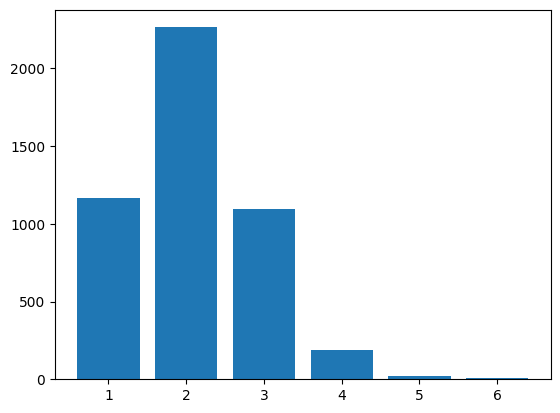

In [7]:
plt.bar(data['BHK'].value_counts().index, data['BHK'].value_counts().values)

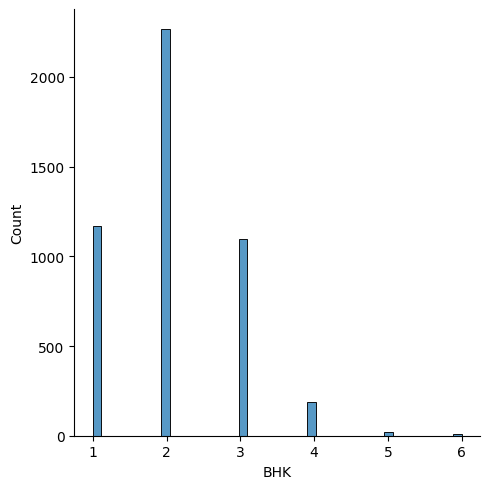

In [8]:
sns.displot(data['BHK'])

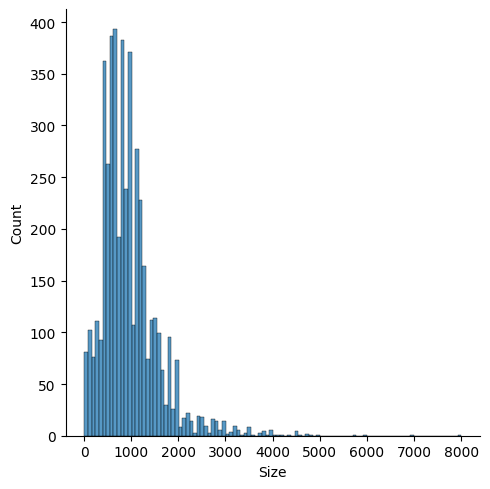

In [9]:
sns.displot(data['Size'])

In [10]:
data['Floor'].value_counts()


Floor
1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: count, Length: 480, dtype: int64

In [11]:
data['Furnishing Status'].value_counts()

Furnishing Status
Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: count, dtype: int64

In [12]:
data['City'].value_counts()

City
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64

## Preprocessing

### Conversion of Categorical Variable to One-Hot Encoding

In [13]:
data = data[['BHK', 'Bathroom', 'Furnishing Status',  'Point of Contact', 'Rent']]

In [14]:
Q1 = data['Rent'].quantile(0.25)
Q3 = data['Rent'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data = data[ (data['Rent'] <= upper_bound)]

In [15]:
Q1 = data['BHK'].quantile(0.25)
Q3 = data['BHK'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data = data[(data['BHK'] >= lower_bound) & (data['BHK'] <= upper_bound)]

In [16]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first= True)
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

In [17]:
data = one_hot_encode(data, 'Furnishing Status')
data = one_hot_encode(data, 'Point of Contact')
#data = one_hot_encode(data, 'City')

In [18]:
data

,BHK,Bathroom,Rent,Semi-Furnished,Unfurnished,Contact Builder,Contact Owner
0,2,2,10000,False,True,False,True
1,2,1,20000,True,False,False,True
2,2,1,17000,True,False,False,True
3,2,1,10000,False,True,False,True
4,2,1,7500,False,True,False,True
...,...,...,...,...,...,...,...
4741,2,2,15000,True,False,False,True
4742,3,3,29000,True,False,False,True
4743,3,3,35000,True,False,False,False
4744,3,2,45000,True,False,False,False


### Training and Test Split

In [19]:
X = data.drop('Rent', axis= 1)
y = data['Rent']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

### Standardizing the Values

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=7, include_bias=False)
# X_train = poly.fit_transform(X_train)
# X_test = poly.transform(X_test)


In [23]:
data

,BHK,Bathroom,Rent,Semi-Furnished,Unfurnished,Contact Builder,Contact Owner
0,2,2,10000,False,True,False,True
1,2,1,20000,True,False,False,True
2,2,1,17000,True,False,False,True
3,2,1,10000,False,True,False,True
4,2,1,7500,False,True,False,True
...,...,...,...,...,...,...,...
4741,2,2,15000,True,False,False,True
4742,3,3,29000,True,False,False,True
4743,3,3,35000,True,False,False,False
4744,3,2,45000,True,False,False,False


## Modelling

In [24]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([ 1745.97828683,  4226.86016873, -2177.18926176, -2769.6473063 ,
        -307.28859573, -6691.47385915])

## Evaluation

### Quantitative Evaluation

In [25]:
y_preds = model.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficients: 
 [ 1745.97828683  4226.86016873 -2177.18926176 -2769.6473063
  -307.28859573 -6691.47385915]
Mean squared error: 91584368.37
Coefficient of determination: 0.51


### Qualitative Evaluation

In [27]:
sample_data = X.iloc[0]
sample_data

BHK                    2
Bathroom               2
Semi-Furnished     False
Unfurnished         True
Contact Builder    False
Contact Owner       True
Name: 0, dtype: object

In [28]:
sample_data_standardized = sc.transform(X.iloc[0].values.reshape(1,-1))

c:\Users\Gelo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
model_rent_forecast = model.predict(sample_data_standardized)[0]
model_rent_forecast

15467.08457561883

In [30]:
y.iloc[0]

10000